In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

In [2]:
np.__version__

'1.10.4'

In [3]:
#infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs.out"
#szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz.out"
infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs_top2000.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz_top2000.out"
z_array = np.arange(0.0050,2.1100,0.0100) #this is the grid output by BPZ for my runs
z_trues = np.loadtxt(szfile,skiprows=1)
alldata = np.loadtxt(infile,skiprows=1)
ID = alldata[:,0]
pzs = alldata[:,1:]
ngals = len(ID)
print ngals
print pzs.shape
print pzs[0]
print z_trues[0]
print z_trues[-1]

1999
(1999, 211)
[ 0.07577   0.1288    0.1774    0.1968    0.1754    0.1254    0.07185
  0.03299   0.01213   0.003573  0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.
  0.        0

In [4]:
approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

made the pool of 4 in 0.0288481712341
made the catalog in 3.34554409981


In [5]:
testme = inmet.EvaluateMetric(approx_pdf,z_trues)

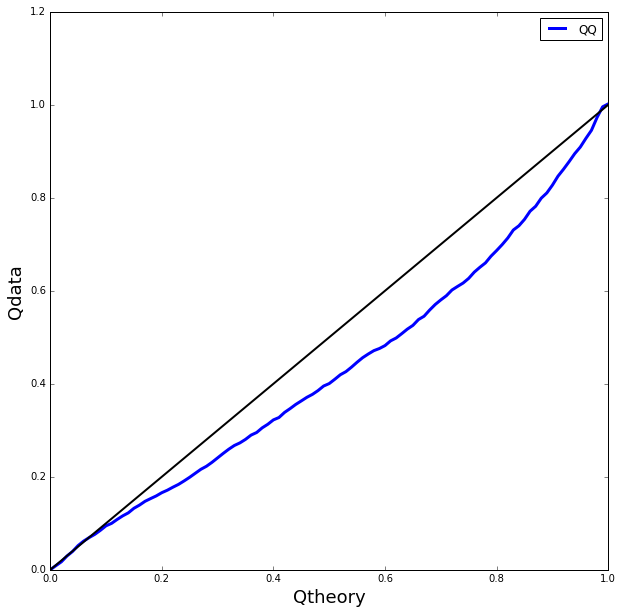

In [6]:
qqplot = testme.QQplot(using='gridded',dx=0.0001,Nquants=101)

In [7]:
qt,qd = testme.QQvectors(using='gridded',dx=0.0001,Nquants=101)
print qt,qd

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ] [  3.20088817e-15   8.69676779e-03   1.71633381e-02   2.95903798e-02
   3.93679625e-02   5.21591162e-02   6.17542958e-02   6.94302548e-02
   7.63039453e-02   8.49499621e-02   9.45956417e-02   9.98923965e-02
   1.08300725e-01   1.16011670e-01   1.22465327e-01   1.32257714e-01
   1.39150703e-01   1.47321222e-01   1.53196608e-01   1.58877663e-01
   1.65834624e-01   1.71213387e-01   1.

In [8]:
testPIT = testme.PIT()

In [9]:
print testPIT

[0.52159441421365538, 0.87156650084031684, 0.45217926362313249, 0.57076253240551467, 0.63568383139092954, 0.68143123428704, 0.45717948897870947, 0.2332214059706052, 0.14570803334747556, 0.19730112159101926, 0.50746334421174932, 0.62359321147557101, 0.47330592065716248, 0.42139649000487545, 0.57234861329260378, 0.49853951483107817, 0.48163883382943462, 0.73367224231847705, 0.55778263560896801, 1.0012460372528649, 0.58886768848605608, 0.6543603084008931, 0.84853364953233146, 0.65849212986841044, 0.37493063034144797, 0.2975680951361781, 0.3236963682508312, 0.7338275706205335, 0.7124205388754119, 0.15452042535533192, 0.62679012827632563, 0.45658733459762191, 0.3189889188643153, 0.70907678308949162, 0.40994932623285607, 0.20333596000787174, 0.80993635461951052, 0.26076379411214567, 0.92010063380447527, 0.41954796238305475, 0.76159563749984194, 0.75352893241649743, 0.079701820840141838, 0.51198982856957864, 0.5772445347330043, 0.29472818298280945, 0.028599582676211471, 0.72335930789602954, 0

In [10]:
outfp = open("testpitstuff.out","w")
for i in range(len(testPIT)):
    outfp.write("%5.5f\n"%(testPIT[i]))
outfp.close()

In [11]:
ks_stat,ks_pval = testme.KS(using='gridded',dx=0.0001)

In [12]:
print ks_stat
print ks_pval

0.125235094748
8.70871591413e-28


In [13]:
cvm_stat,cvm_pval=testme.CvM(using='gridded',dx=0.0001)

In [14]:
print cvm_stat
print cvm_pval

13.2286080787
1.99323890726e-10


In [15]:
ad_stat,ad_pval=testme.AD(using='gridded',dx=0.0001)

In [16]:
print ad_stat
print ad_pval

69.9528756536
3.06278713502e-07


Now try the stacked and individual KL Divergence in Alex Malz' code

In [17]:
sumpdf = approx_pdf.stack(loc=z_array,using='gridded',vb=True)

In [18]:
nz = qp.PDF(gridded=(sumpdf['gridded'][0],sumpdf['gridded'][1]))
print nz

In [19]:
true_pdf = qp.PDF(samples=z_trues)

In [20]:
print true_pdf

In [21]:
finkld = qp.utils.calculate_kl_divergence(true_pdf,nz,limits=(0.02,2.11),dx=0.01,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.02 and 2.1 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.02 and 2.1 using gridded
almost normalized integrals


In [22]:
print finkld

0.306255652276


In [23]:
finkldx = qp.utils.calculate_kl_divergence(true_pdf,nz,limits=(0.02,2.11),dx=0.05,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.02 and 2.07 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.02 and 2.07 using gridded
almost normalized integrals


In [24]:
print finkldx

0.284321285926


slight difference with a coarser grid, as expected

In [25]:
finrmse = qp.utils.calculate_rmse(true_pdf,nz,limits=(0.02,2.11),dx=0.01,vb=True)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.02 and 2.11 using samples
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.02 and 2.11 using gridded


In [26]:
print finrmse

0.661644017931


In [27]:
print testPIT[19]

1.00124603725


# Test N(z) metrics with new class

In [28]:
xarray = np.arange(0.0,2.12,0.005)
nzobj = inmet.NzSumEvaluateMetric(approx_pdf,z_trues,eval_grid=xarray,using='gridded',dx=0.0001)

In [29]:
ks_stat,ks_pval = nzobj.NZKS()

In [30]:
print ks_stat
print ks_pval

0.249733729916
2.50311438502e-110


In [31]:
cvm_stat,cvm_pval = nzobj.NZCVM()

In [32]:
print cvm_stat
print cvm_pval

19.8443562307
1.24467229856e-07


In [33]:
ad_stat,ad_pval = nzobj.NZAD()

In [34]:
print ad_stat
print ad_pval

126.212439628
3.00150074906e-07


In [35]:
xarray = np.arange(0.0,2.12,0.005)
tmpnzpdf = inmet.QPPDFCDF(nz)
tmppdf = tmpnzpdf.pdf(xarray)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.038 and 0.358 using samples
Plotted samples


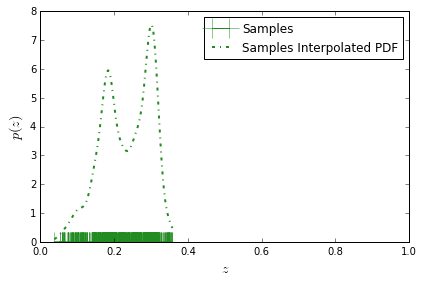

In [36]:
true_pdf.plot()

In [37]:
tmpjjj = true_pdf.evaluate(xarray)
truegridpdf = qp.PDF(gridded=(tmpjjj[0],tmpjjj[1]))
otherobj = inmet.QPPDFCDF(truegridpdf)

Created a KDE interpolator for the samples parametrization.
interpolating between 0.0 and 2.115 using samples


In [38]:
xpdf = otherobj.pdf(xarray)


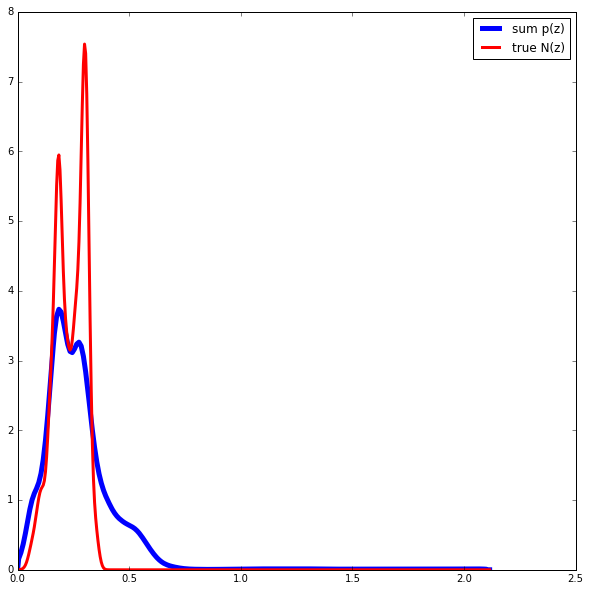

In [41]:
fig = plt.figure(figsize=(10,10))
plt.plot(xarray,tmppdf,lw=5,c='b',label='sum p(z)')
plt.plot(xarray,xpdf,lw=3,c='r',label='true N(z)')
plt.legend()